In [22]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [23]:
class LoopTrajectory:
    def __init__(self, viapoints, t_tot):
        """
        Initialize with an array of viapoints. Viapoints should be a Nx2 array.
        """
        self.viapoints = np.array(viapoints)
        # if the last and first viapoints does not match, append 
        if not np.allclose(self.viapoints[0], self.viapoints[-1]):
            self.viapoints = np.vstack([self.viapoints, self.viapoints[0]])
        self.t_tot = t_tot
        self.compute_spline(t_tot)
    
    def compute_spline(self, t_tot):
        """
        Compute cubic spline for the given viapoints.
        """
        t = np.linspace(0, t_tot, len(self.viapoints))
        self.spline_x = CubicSpline(t, self.viapoints[:, 0], bc_type='periodic')
        self.spline_y = CubicSpline(t, self.viapoints[:, 1], bc_type='periodic')
    
    def eval_trajectory(self, t):
        """
        Compute x, y, omega, x_dot, y_dot, omega_dot as a function of t.
        """
        x = self.spline_x(t)
        y = self.spline_y(t)
        x_dot = self.spline_x(t, 1)
        y_dot = self.spline_y(t, 1)

        theta = np.arctan2(y_dot.item(0), x_dot.item(0))

        w_R_b = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
        
        b_vel_xy = (w_R_b.T).dot(np.array([x_dot,y_dot]))
        # v = np.linalg.norm(b_vel_xy)
        v = b_vel_xy[0]

        x_ddot = self.spline_x(t, 2)
        y_ddot = self.spline_y(t, 2)

        omega = (x_dot * y_ddot - y_dot * x_ddot) / (x_dot**2 + y_dot**2)

        b_vel_dot_xy = (w_R_b.T).dot(np.array([x_ddot,y_ddot]))
        # v_dot = np.linalg.norm(b_vel_dot_xy)
        v_dot = b_vel_dot_xy[0]

        #TODO
        omega_dot = 0.

        return x, y, theta, v, omega, v_dot, omega_dot
    
    def plot_trajectory(self):
        """
        Plot the trajectory for visualization.
        """
        t = np.linspace(0, self.t_tot, 100)
        x, y, _ , _ , _, _, _ = self.eval_trajectory(t)
        
        plt.figure()
        plt.plot(x, y, label='Trajectory')
        plt.plot(self.viapoints[:, 0], self.viapoints[:, 1], 'ro', label='Points')
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Closed Loop Trajectory')
        plt.grid()
        plt.show()

In [24]:
def generate_circle_viapoints(radius, num_points):
    # Generate angles evenly spaced around the circle
    angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    
    # Calculate x and y coordinates for each angle
    x_coords = radius * np.cos(angles)
    y_coords = radius * np.sin(angles)
    
    # Combine x and y into a single array of shape (num_points, 2)
    viapoints = np.column_stack((x_coords, y_coords))
    
    return viapoints

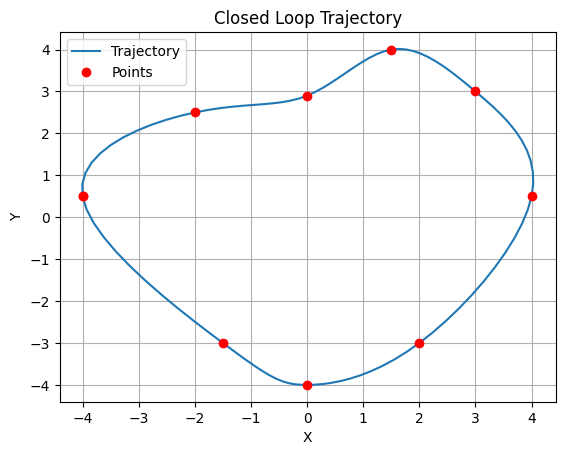

In [25]:
# Example usage:
viapoints = np.array([[-4.,  0.5],
                      [-1.5, -3.],
                      [0., -4.],
                      [2., -3.],
                      [4.,  0.5],
                      [3.,  3.],
                      [1.5,  4.],
                      [0.,  2.9],
                      [-2.,  2.5]])

# viapoints = generate_circle_viapoints(3, 20)


t_tot = 10
trajectory = LoopTrajectory(viapoints, t_tot)
trajectory.plot_trajectory()

In [26]:

# Compute trajectory values at specific time
t_values = np.linspace(0, t_tot, 10)
for t in t_values:
    x, y, theta, v, omega, v_dot, omega_dot = trajectory.eval_trajectory(t)
    print(f"t={t:.2f}: x={x:.2f}, y={y:.2f}, theta={theta:.2f}, v={v:.2f}, omega={omega:.2f}, v_dot={v_dot:.2f}, omega_dot={omega_dot:.2f}")


t=0.00: x=-4.00, y=0.50, theta=-1.45, v=2.99, omega=2.12, v_dot=3.00, omega_dot=0.00
t=1.11: x=-1.50, y=-3.00, theta=-0.78, v=3.25, omega=0.05, v_dot=-4.66, omega_dot=0.00
t=2.22: x=0.00, y=-4.00, theta=0.01, v=1.22, omega=0.61, v_dot=1.24, omega_dot=0.00
t=3.33: x=2.00, y=-3.00, theta=0.78, v=3.21, omega=0.59, v_dot=2.82, omega_dot=0.00
t=4.44: x=4.00, y=0.50, theta=1.42, v=3.10, omega=1.15, v_dot=-2.47, omega_dot=0.00
t=5.56: x=3.00, y=3.00, theta=2.30, v=2.23, omega=0.06, v_dot=-0.72, omega_dot=0.00
t=6.67: x=1.50, y=4.00, theta=-2.92, v=1.33, omega=2.13, v_dot=0.69, omega_dot=0.00
t=7.78: x=0.00, y=2.90, theta=-2.65, v=1.62, omega=-1.17, v_dot=-0.80, omega_dot=0.00
t=8.89: x=-2.00, y=2.50, theta=-2.87, v=2.53, omega=0.55, v_dot=2.08, omega_dot=0.00
t=10.00: x=-4.00, y=0.50, theta=-1.45, v=2.99, omega=2.12, v_dot=3.00, omega_dot=0.00
